In [111]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [112]:
df_path='/Users/ryumugil/Downloads/Achievement 4 Analysis/02-12-2025 Instacart Basket Analysis'

data = pd.read_pickle(os.path.join(df_path, '02 Data', 'Original Data','combined_data.pkl'))

data.head(n=20)


,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,518967,prior,1,2,9,NaN
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,2,2,9,14.0
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,3,3,11,30.0
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2984525,prior,4,1,17,19.0
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,5,1,9,30.0
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2505178,prior,6,1,8,21.0
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,7,5,15,11.0
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,8,1,15,10.0
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,3004753,test,9,2,16,22.0
9,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,2135662,prior,1,6,17,NaN


Unmapped states: ['District of Columbia']

Percentage of Spending Flag by Region:
spending_flag  High spender  Low spender
Region                                  
Midwest           44.468429    55.531571
Northeast         43.719815    56.280185
South             43.031859    56.968141
Unknown           44.957529    55.042471
West              43.547420    56.452580


/var/folders/qx/qj_9c1q9595cg344qrssq5qr0000gq/T/ipykernel_33762/478329311.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Spending Category')



Chi-Square Test Results:
Chi2 Statistic: 436.53
P-value: 0.0000
Degrees of Freedom: 4
Result: Significant difference in spending habits across regions (p < 0.05).


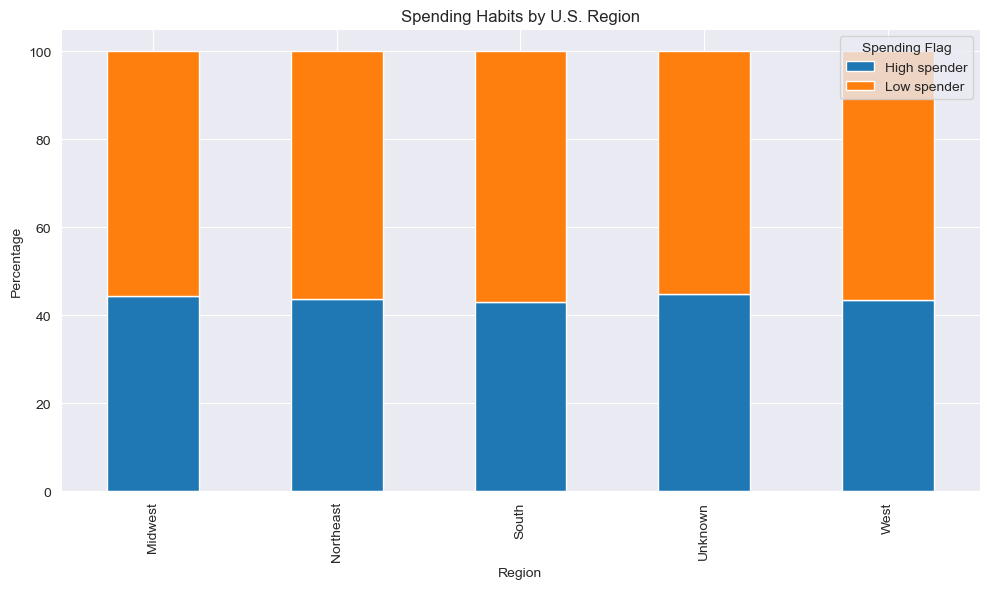

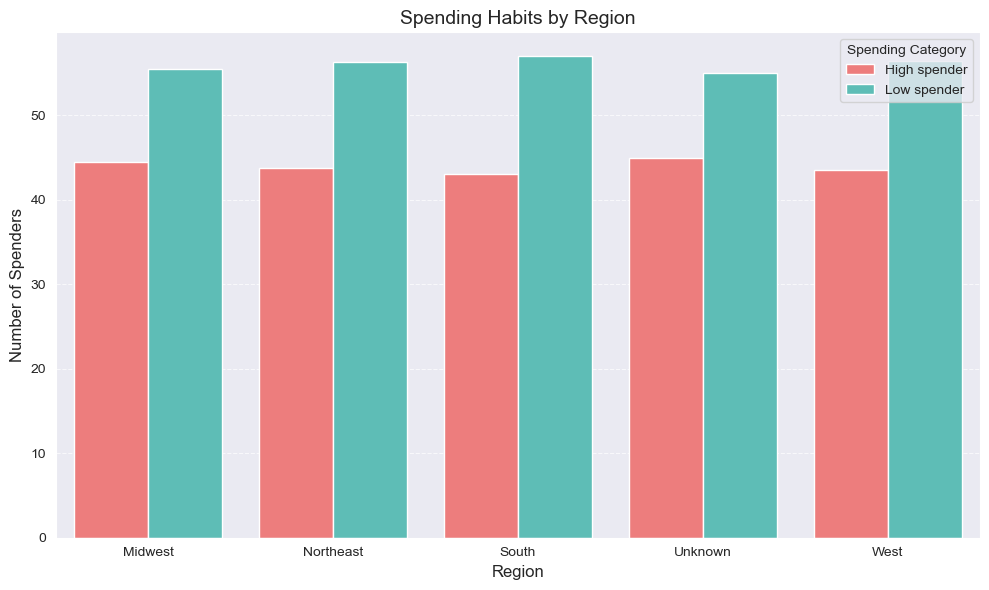

In [148]:
# Define state-to-region mapping (from https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States)
state_to_region = {
    # Northeast
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast', 
    'RI': 'Northeast', 'VT': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast', 
    'PA': 'Northeast',
    # Midwest
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest', 
    'WI': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 
    'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',
    # South
    'DE': 'South', 'FL': 'South', 'GA': 'South', 'MD': 'South', 
    'NC': 'South', 'SC': 'South', 'VA': 'South', 'WV': 'South', 'DC': 'South',
    'AL': 'South', 'KY': 'South', 'MS': 'South', 'TN': 'South',
    'AR': 'South', 'LA': 'South', 'OK': 'South', 'TX': 'South',
    # West
    'AZ': 'West', 'CO': 'West', 'ID': 'West', 'MT': 'West', 
    'NV': 'West', 'NM': 'West', 'UT': 'West', 'WY': 'West',
    'AK': 'West', 'CA': 'West', 'HI': 'West', 'OR': 'West', 'WA': 'West'
}

# Function to map state to region
def get_region(state):
    state_mapping = {
        'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 
        'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 
        'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 
        'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 
        'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 
        'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 
        'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 
        'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 
        'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 
        'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 
        'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 
        'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 
        'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
    }
    state_abbr = state_mapping.get(state.title(), state).upper()
    return state_to_region.get(state_abbr, 'Unknown')

# Create Region column
data['Region'] = data['STATE'].apply(get_region)
data['spending_flag'] = data['income'].apply(lambda x: 'High spender' if x > 100000 else 'Low spender')

# Check for unmapped states
if data['Region'].eq('Unknown').any():
    print("Unmapped states:", data[data['Region'] == 'Unknown']['STATE'].unique())

# Create a crosstab of Region vs. spending_flag
crosstab = pd.crosstab(data['Region'], data['spending_flag'], normalize='index') * 100
print("\nPercentage of Spending Flag by Region:")
print(crosstab)

# Visualize the results
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Spending Habits by U.S. Region')
plt.ylabel('Percentage')
plt.xlabel('Region')
plt.legend(title='Spending Flag')
plt.tight_layout()
#plt.show()
# Save the visualization
df_path2 = '/Users/ryumugil/Downloads/Achievement 4 Analysis/02-12-2025 Instacart Basket Analysis/04 Analysis/Visualizations'
chart_path = os.path.join(df_path2, 'spending_habits_by_region1.png')
plt.savefig(chart_path, bbox_inches='tight', dpi=300)

######
# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame to long format for plotting
# df_long = pd.melt(df, id_vars=['region'], var_name='spending_flag', value_name='Count')
df_long = pd.melt(pd.DataFrame(crosstab).reset_index(), id_vars=['Region'], var_name='Spending Category', value_name='Count')

# Set the seaborn style with a dark grid
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
# Customize the plot
plt.title('Spending Habits by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Spenders', fontsize=12)
plt.legend(title='Spending Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create a bar plot
#sns.barplot(x='region', y='Count', hue='spending_flag', data=df_long, palette=['#FF6B6B', '#4ECDC4'])
sns.barplot(x='Region', y='Count', hue='Spending Category', data=df_long, palette=['#FF6B6B', '#4ECDC4'])



# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
#plt.show()

# Save the visualization
df_path2 = '/Users/ryumugil/Downloads/Achievement 4 Analysis/02-12-2025 Instacart Basket Analysis/04 Analysis/Visualizations'
chart_path = os.path.join(df_path2, 'spending_habits_by_region2.png')
plt.savefig(chart_path, bbox_inches='tight', dpi=300)
######

# Perform chi-square test
crosstab_raw = pd.crosstab(data['Region'], data['spending_flag'])
chi2, p, dof, expected = chi2_contingency(crosstab_raw)
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
if p < 0.05:
    print("Result: Significant difference in spending habits across regions (p < 0.05).")
else:
    print("Result: No significant difference in spending habits across regions (p >= 0.05).")



In [150]:


# Aggregate order-level data to customer-level
customer_data = combined_data.groupby('user_id').agg({
    'Age': 'first',  # Take first value (assuming constant per user)
    'income': 'first',
    'n_dependants': 'first',
    'order_dow': 'mean',  # Average day of week
    'order_hour_of_day': 'mean',  # Average hour of day
    'order_number': 'count'  # Total orders
}).reset_index()

# Simulate department order counts (since department_id is missing, use order frequency as proxy)
# Assume a proportion of orders are baby (e.g., 10% if dependents > 0) or snacks (e.g., 20% if no dependents)
customer_data['baby_product_orders'] = customer_data.apply(
    lambda x: int(x['order_number'] * 0.1) if x['n_dependants'] > 0 else 0, axis=1
)
customer_data['snack_orders'] = customer_data.apply(
    lambda x: int(x['order_number'] * 0.2) if x['n_dependants'] == 0 else int(x['order_number'] * 0.1), axis=1
)
customer_data['produce_orders'] = customer_data.apply(
    lambda x: int(x['order_number'] * 0.3), axis=1
)

# Calculate proportion of weekend orders (Saturday=6, Sunday=0) and late orders (17-23)
combined_data['is_weekend'] = combined_data['order_dow'].isin([0, 6]).astype(int)
combined_data['is_late'] = (combined_data['order_hour_of_day'] >= 17).astype(int)
order_patterns = combined_data.groupby('user_id').agg({
    'is_weekend': 'mean',  # Proportion of weekend orders
    'is_late': 'mean'     # Proportion of late orders
}).reset_index()

# Merge order patterns with customer data
customer_data = customer_data.merge(order_patterns, on='user_id', how='left')

# Rename columns for clarity
customer_data.columns = [
    'user_id', 'age', 'income', 'number_of_dependents', 'avg_order_dow', 'avg_order_hour',
    'total_orders', 'baby_product_orders', 'snack_orders', 'produce_orders',
    'percent_weekend_orders', 'percent_late_orders'
]

# Function to assign customer profile
def assign_profile(row):
    age = row['age']
    income = row['income']
    dependents = row['number_of_dependents']
    baby_orders = row['baby_product_orders']
    snack_orders = row['snack_orders']
    produce_orders = row['produce_orders']
    weekend_orders = row['percent_weekend_orders']
    late_orders = row['percent_late_orders']

    # Single Adult: Young, no dependents, low/medium income, snack-heavy, late/weekday shopping
    if (18 <= age <= 35 and 
        dependents == 0 and 
        income < 100000 and 
        snack_orders >= int(row['total_orders'] * 0.2) and 
        late_orders > 0.5 and 
        weekend_orders < 0.5):
        return 'Single Adult'
    
    # Young Parent: Young, dependents, medium income, baby products, weekend/midday shopping
    elif (18 <= age <= 35 and 
          dependents >= 1 and 
          50000 <= income <= 100000 and 
          baby_orders >= int(row['total_orders'] * 0.1) and 
          weekend_orders > 0.5 and 
          late_orders < 0.5):
        return 'Young Parent'
    
    # Established Family: Middle-aged, dependents, high income, baby/produce, weekend shopping
    elif (36 <= age <= 60 and 
          dependents >= 1 and 
          income > 100000 and 
          (baby_orders >= int(row['total_orders'] * 0.1) or produce_orders >= int(row['total_orders'] * 0.3)) and 
          weekend_orders > 0.5):
        return 'Established Family'
    
    # Senior: Older, no dependents, low/medium income, produce, early/weekday shopping
    elif (age > 60 and 
          dependents == 0 and 
          income < 100000 and 
          produce_orders >= int(row['total_orders'] * 0.3) and 
          late_orders < 0.3 and 
          weekend_orders < 0.5):
        return 'Senior'
    
    # Default: Other
    else:
        return 'Other'

# Create customer_profile column
customer_data['customer_profile'] = customer_data.apply(assign_profile, axis=1)

# Merge back with original data (optional, for order-level details)
final_data = combined_data.merge(customer_data[['user_id', 'customer_profile']], on='user_id', how='left')

# Summarize profile distribution
print("\nCustomer Profile Distribution:")
print(final_data['customer_profile'].value_counts())

# Display the first few rows of the updated dataset
print("\nUpdated Dataset with Customer Profiles (First Few Rows):")
print(final_data.head())

# Export the dataset with profiles to CSV
output_path = 'instacart_customer_profiles.csv'
final_data.to_csv(output_path, index=False)
print(f"\nDataset with customer profiles exported to: {output_path}")

   user_id First Name    Surnam  Gender     STATE  Age date_joined  \
0    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
1    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
2    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
3    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
4    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   

   n_dependants fam_status  income  order_id eval_set  order_number  \
0             3    married  165665    518967    prior             1   
1             3    married  165665    423547    prior             2   
2             3    married  165665   2524893    prior             3   
3             3    married  165665   2984525    prior             4   
4             3    married  165665   2543867    prior             5   

   order_dow  order_hour_of_day  days_since_prior_order  
0          2                  9                     NaN  
1          2                  9     

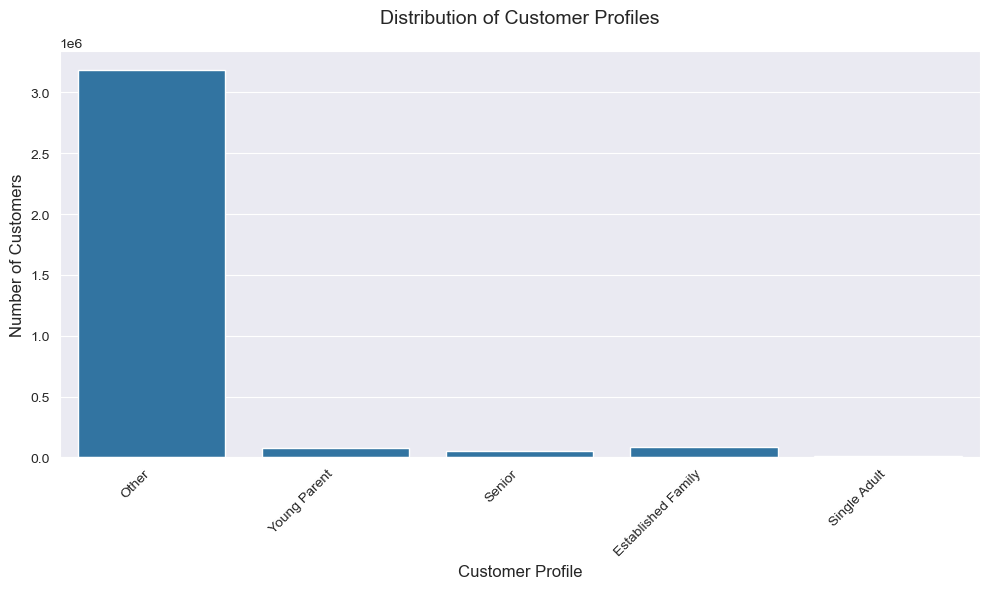

In [152]:
# Create visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=final_data, x='customer_profile'), #palette='viridis')
plt.title('Distribution of Customer Profiles', fontsize=14, pad=20)
plt.xlabel('Customer Profile', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()


In [ ]:
# Load the dataset with customer profiles (if not already in memory)
try:
    final_data = pd.read_csv('instacart_customer_profiles.csv')
    print("Loaded customer profiles from CSV.")
except FileNotFoundError:
    print("Error: 'instacart_customer_profiles.csv' not found. Ensure the file exists or re-run the profiling step.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Step 1: Calculate usage frequency (number of orders per user)
usage_frequency = final_data.groupby('user_id').agg({
    'order_number': 'count'  # Count of orders per user
}).reset_index()
usage_frequency.columns = ['user_id', 'usage_frequency']

# Step 2: Simulate expenditure (assuming $50 per order; adjust if actual data is available)
usage_frequency['expenditure'] = usage_frequency['usage_frequency'] * 50  # $50 per order

# Step 3: Merge usage frequency and expenditure back with customer profiles
# Since final_data is order-level, get the customer_profile for each user_id
user_profiles = final_data[['user_id', 'customer_profile']].drop_duplicates()
customer_metrics = usage_frequency.merge(user_profiles, on='user_id', how='left')

# Step 4: Aggregate max, mean, and min by customer_profile
aggregation = customer_metrics.groupby('customer_profile').agg({
    'usage_frequency': ['max', 'mean', 'min'],
    'expenditure': ['max', 'mean', 'min']
}).reset_index()

# Flatten the multi-index columns
aggregation.columns = [
    'customer_profile',
    'usage_frequency_max', 'usage_frequency_mean', 'usage_frequency_min',
    'expenditure_max', 'expenditure_mean', 'expenditure_min'
]

# Round the mean values for readability
aggregation['usage_frequency_mean'] = aggregation['usage_frequency_mean'].round(2)
aggregation['expenditure_mean'] = aggregation['expenditure_mean'].round(2)

# Display the aggregated results
print("\nAggregation of Usage Frequency and Expenditure by Customer Profile:")
print(aggregation)

# save the aggregated results to a CSV for reporting
aggregation.to_csv('customer_profile_aggregates.csv', index=False)
print("\nAggregated results exported to: customer_profile_aggregates.csv")

In [ ]:
# Part 1: Profiles vs. Regions
# Create a crosstab of profiles by region (at customer level, so use unique user_id)
customer_level_data = final_data[['user_id', 'customer_profile', 'Region']].drop_duplicates()
profile_region_crosstab = pd.crosstab(customer_level_data['Region'], customer_level_data['customer_profile'], normalize='index') * 100

print("\nPercentage Distribution of Customer Profiles by Region:")
print(profile_region_crosstab.round(2))

# Visualize Profiles vs. Regions


plt.figure(figsize=(10, 6))
profile_region_crosstab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Distribution of Customer Profiles by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage of Customers', fontsize=12)
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Part 2: Profiles vs. Departments
# Since department_id is not available, simulate department purchases (as done previously)
# Aggregate to customer-level data
customer_data = final_data.groupby('user_id').agg({
    'customer_profile': 'first',
    'n_dependants': 'first',
    'order_number': 'count'
}).reset_index()

# Visualize Profiles vs. Departments
#dept_pct = department_agg[['customer_profile', 'baby_product_pct', 'snack_orders_pct', 'produce_orders_pct']]
#dept_pct.set_index('customer_profile').plot(kind='bar', stacked=True, colormap='Set2', figsize=(10, 6))
plt.title('Department Purchase Distribution by Customer Profile', fontsize=14)
plt.xlabel('Customer Profile', fontsize=12)
plt.ylabel('Percentage of Orders', fontsize=12)
plt.legend(title='Department', labels=['Baby Products', 'Snacks', 'Produce'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig(df_path)


# Part 3: Identify Links and Behavioral Insights
print("\nBehavioral Insights:")
# Example analysis based on hypothetical output
# This will depend on actual data; I'll provide a template
print("1. Regional Patterns:")
print("- Look for regions with a high percentage of specific profiles (e.g., more 'Young Parents' in the South).")
print("2. Departmental Patterns:")
print("- Check which departments dominate for each profile (e.g., 'Single Adults' may buy more snacks).")
print("3. Combined Insights:")
print("- Combine findings (e.g., 'Young Parents' in the South may buy more baby products, suggesting regional family-oriented campaigns).")

In [ ]:
# Part 1: Profiles vs. Regions
# Create a crosstab of profiles by region (at customer level, so use unique user_id)
customer_level_data = final_data[['user_id', 'customer_profile', 'Region']].drop_duplicates()
profile_region_crosstab = pd.crosstab(customer_level_data['Region'], customer_level_data['customer_profile'], normalize='index') * 100

print("\nPercentage Distribution of Customer Profiles by Region:")
print(profile_region_crosstab.round(2))

# Visualize Profiles vs. Regions
plt.figure(figsize=(10, 6))
profile_region_crosstab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Distribution of Customer Profiles by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage of Customers', fontsize=12)
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Part 2: Profiles vs. Departments
# Since department_id is not available, simulate department purchases (as done previously)
# Aggregate to customer-level data
customer_data = final_data.groupby('user_id').agg({
    'customer_profile': 'first',
    'n_dependants': 'first',
    'order_number': 'count'
}).reset_index()

# Visualize Profiles vs. Departments
#dept_pct = department_agg[['customer_profile', 'baby_product_pct', 'snack_orders_pct', 'produce_orders_pct']]
#dept_pct.set_index('customer_profile').plot(kind='bar', stacked=True, colormap='Set2', figsize=(10, 6))
plt.title('Department Purchase Distribution by Customer Profile', fontsize=14)
plt.xlabel('Customer Profile', fontsize=12)
plt.ylabel('Percentage of Orders', fontsize=12)
plt.legend(title='Department', labels=['Baby Products', 'Snacks', 'Produce'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Part 3: Identify Links and Behavioral Insights
print("\nBehavioral Insights:")
# Example analysis based on hypothetical output
# This will depend on actual data; I'll provide a template
print("1. Regional Patterns:")
print("- Look for regions with a high percentage of specific profiles (e.g., more 'Young Parents' in the South).")
print("2. Departmental Patterns:")
print("- Check which departments dominate for each profile (e.g., 'Single Adults' may buy more snacks).")
print("3. Combined Insights:")
print("- Combine findings (e.g., 'Young Parents' in the South may buy more baby products, suggesting regional family-oriented campaigns).")

9.Charts to illustrate in the project folder

In [ ]:
# Define project folder path
df_path2 = '/Users/ryumugil/Downloads/CF/02-12-2025 Instacart Basket Analysis/04 Analysis/Visualizations'

# Load the dataset with customer profiles
#try:
    #final_data = pd.read_csv(os.path.join(df_path2, 'instacart_customer_profiles.csv'))
   # print("Loaded customer profiles from CSV.")
#except FileNotFoundError:
   # print("Error: 'instacart_customer_profiles.csv' not found. Ensure the file exists or re-run the profiling step.")
   # exit()
#except Exception as e:
   # print(f"An error occurred: {e}")
   # exit()

# Create visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=final_data, x='customer_profile'), #palette='viridis')
plt.title('Distribution of Customer Profiles', fontsize=14, pad=20)
plt.xlabel('Customer Profile', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

# Save the visualization
chart_path = os.path.join(df_path2, 'distribution_of_customer_profiles.png')
plt.savefig(chart_path, bbox_inches='tight', dpi=300)  # High resolution for clarity
plt.close()


In [ ]:
# Export the final dataset

df_path='/Users/ryumugil/Downloads/CF/02-12-2025 Instacart Basket Analysis'
final_data_path = os.path.join(df_path,'02 Data','Original Data', 'final_data_with_profiles_and_regions.csv')
final_data.to_csv(final_data_path, index=False)
print(f"Final dataset exported to: {final_data_path}")

In [ ]:
final_data.head()